**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [43]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
#%load_ext pycodestyle_magic


In [44]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.num_of_neighbors = n_neighbors
        self.alg = algorithm
    
    def fit(self, X, y):
        self.X_train = np.array(X).astype(float)
        self.y_train = np.array(y).astype(int)
        self.num_of_classes = np.unique(self.y_train)
        
        if self.alg == 'kd_tree':
            self.tree = KDTree(X)
    
    def predict(self, X):
        X = np.array(X).astype(float)
        
        if self.alg == 'brute':
            distance = self.get_dist(X)
            sort_ind = np.array(self.y_train[np.argsort(distance)[:, : self.num_of_neighbors]])
        else:
            dist, ind = self.tree.query(X, k=self.num_of_neighbors, return_distance=True)
            sort_ind = np.array(y_train[ind])
        
        return np.apply_along_axis(lambda n: np.bincount(n).argmax(), axis=1, arr=sort_ind)
    
    def predict_proba(self, X):
        X = np.array(X).astype(float)
        test_size = X.shape[0]
        sum_arr = np.zeros((test_size, self.num_of_classes.shape[0]))
        
        if self.alg == 'brute':
            distance = self.get_dist(X)
            ind = np.argsort(distance)[:, :self.num_of_neighbors]
        else:
            dist, ind = self.tree.query(X, k = self.num_of_neighbors, return_distance = True)
            
        for i in range(test_size):
            for j in ind[i]:
                sum_arr[i][self.y_train[j]] += 1

        result = sum_arr / self.num_of_neighbors
        return result
    
    def get_dist(self, X):
        dist1 = self.X_train ** 2
        matrix1 = dist1.sum(axis=1).reshape(1, -1)
        dist2 = X ** 2
        matrix2 = dist2.sum(axis=1).reshape(-1, 1)
        return np.sqrt(matrix2 + matrix1 - 2*np.dot(X, self.X_train.T))
    
    def score(self, X, y):
        diff = self.predict(X) - y
        return 1 - np.count_nonzero(diff) / y.shape[0]

In [245]:
"mvi"

'mvi'

**IRIS**

In [45]:
iris = datasets.load_iris()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

Wall time: 0 ns


In [12]:
%time clf.predict(X_test)

Wall time: 0 ns


array([0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0])

In [13]:
%time my_clf.predict(X_test)

Wall time: 0 ns


array([0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 0], dtype=int64)

In [10]:
%time clf.predict_proba(X_test)

Wall time: 0 ns


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [14]:
%time my_clf.predict_proba(X_test)

Wall time: 0 ns


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [15]:
clf.score(X_test, y_test)

1.0

In [16]:
my_clf.score(X_test, y_test)

1.0

Задание 3

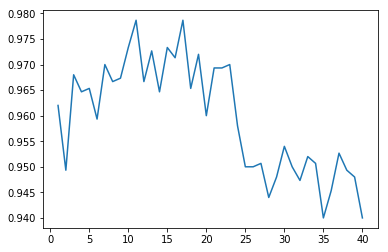

Max score with number of neighbors equal  17


In [47]:
max_num_of_n = 40
num_of_tests = 100

score_arr = np.zeros(max_num_of_n).astype(float)

for i in range(1, max_num_of_n + 1):
    sum_of_scores = 0
    for j in range(num_of_tests):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                            test_size=0.1, stratify=iris.target)
        
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        sum_of_scores += my_clf.score(X_test, y_test)
    sum_of_scores /= num_of_tests
    score_arr[i - 1] += sum_of_scores
    
score_arr
plt.plot(range(1, max_num_of_n+1), score_arr)
plt.show()
print("Max score with number of neighbors equal ", score_arr.argmax() + 1)

best_n_of_n = score_arr.argmax() + 1

**MNIST**

In [48]:
#mnist = fetch_mldata('MNIST original')
from mlxtend.data import loadlocal_mnist
mnist_X_train, mnist_y_train = loadlocal_mnist(
        images_path='C:/c++/Sphere/mnist/train-images.idx3-ubyte', 
        labels_path='C:/c++/Sphere/mnist/train-labels.idx1-ubyte')
mnist_X_test, mnist_y_test = loadlocal_mnist(
        images_path='C:/c++/Sphere/mnist/t10k-images.idx3-ubyte',
        labels_path='C:/c++/Sphere/mnist/t10k-labels.idx1-ubyte'
    )



In [49]:
X_train, y_train, X_test, y_test = mnist_X_train, mnist_y_train, mnist_X_test, mnist_y_test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(mnist_X_train, mnist_y_train, test_size = 0.01, stratify=mnist_y_train)

In [24]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [25]:
%time clf.fit(X_train, y_train)

Wall time: 33.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [26]:
%time my_clf.fit(X_train, y_train)

Wall time: 844 ms


In [27]:
%time clf.predict(X_test)

Wall time: 1min 5s


array([2, 2, 8, 4, 0, 6, 0, 5, 8, 0, 9, 5, 3, 2, 7, 3, 3, 1, 7, 9, 1, 6,
       7, 8, 8, 9, 6, 8, 6, 6, 6, 2, 3, 2, 5, 0, 5, 1, 9, 5, 7, 6, 6, 3,
       1, 4, 5, 9, 4, 0, 5, 0, 3, 2, 4, 2, 2, 3, 0, 5, 0, 1, 3, 2, 4, 4,
       5, 6, 6, 9, 9, 1, 6, 7, 9, 3, 3, 3, 7, 3, 9, 1, 8, 4, 5, 1, 8, 7,
       9, 3, 7, 7, 9, 5, 7, 2, 9, 4, 9, 5, 2, 8, 3, 9, 0, 7, 6, 0, 1, 6,
       4, 4, 8, 9, 0, 9, 1, 7, 4, 2, 1, 6, 8, 2, 2, 0, 0, 7, 6, 5, 9, 7,
       5, 9, 4, 3, 7, 3, 4, 5, 3, 4, 4, 0, 7, 3, 1, 1, 1, 1, 3, 3, 9, 1,
       1, 6, 7, 0, 6, 7, 2, 4, 9, 7, 0, 5, 4, 7, 1, 8, 1, 4, 0, 8, 2, 5,
       2, 3, 6, 3, 6, 3, 8, 3, 7, 6, 0, 7, 4, 9, 0, 4, 8, 9, 1, 4, 8, 3,
       0, 8, 6, 0, 7, 6, 9, 7, 9, 2, 0, 7, 8, 9, 1, 8, 6, 6, 7, 9, 9, 9,
       6, 7, 7, 1, 4, 0, 8, 1, 6, 0, 7, 5, 7, 7, 1, 9, 4, 4, 4, 1, 7, 8,
       2, 4, 0, 1, 6, 9, 0, 4, 6, 6, 2, 0, 6, 7, 9, 7, 9, 1, 3, 2, 1, 7,
       0, 7, 2, 9, 8, 3, 6, 9, 2, 0, 6, 6, 8, 1, 6, 2, 0, 8, 5, 8, 5, 0,
       7, 2, 8, 7, 8, 8, 7, 6, 2, 6, 4, 7, 1, 2, 3,

In [28]:
%time my_clf.predict(X_test)

Wall time: 22.1 s


array([2, 2, 8, 4, 0, 6, 0, 5, 8, 0, 9, 5, 3, 2, 7, 3, 3, 1, 7, 9, 1, 6,
       7, 8, 8, 9, 6, 8, 6, 6, 6, 2, 3, 2, 5, 0, 5, 1, 9, 5, 7, 6, 6, 3,
       1, 4, 5, 9, 4, 0, 5, 0, 3, 2, 4, 2, 2, 3, 0, 5, 0, 1, 3, 2, 4, 4,
       5, 6, 6, 9, 9, 1, 6, 7, 9, 3, 3, 3, 7, 3, 9, 1, 8, 4, 5, 1, 8, 7,
       9, 3, 7, 7, 9, 5, 7, 2, 9, 4, 9, 5, 2, 8, 3, 9, 0, 7, 6, 0, 1, 6,
       4, 4, 8, 9, 0, 9, 1, 7, 4, 2, 1, 6, 8, 2, 2, 0, 0, 7, 6, 5, 9, 7,
       5, 9, 4, 3, 7, 3, 4, 5, 3, 4, 4, 0, 7, 3, 1, 1, 1, 1, 3, 3, 9, 1,
       1, 6, 7, 0, 6, 7, 2, 4, 9, 7, 0, 5, 4, 7, 1, 8, 1, 4, 0, 8, 2, 5,
       2, 3, 6, 3, 6, 3, 8, 3, 7, 6, 0, 7, 4, 9, 0, 4, 8, 9, 1, 4, 8, 3,
       0, 8, 6, 0, 7, 6, 9, 7, 9, 2, 0, 7, 8, 9, 1, 8, 6, 6, 7, 9, 9, 9,
       6, 7, 7, 1, 4, 0, 8, 1, 6, 0, 7, 5, 7, 7, 1, 9, 4, 4, 4, 1, 7, 8,
       2, 4, 0, 1, 6, 9, 0, 4, 6, 6, 2, 0, 6, 7, 9, 7, 9, 1, 3, 2, 1, 7,
       0, 7, 2, 9, 8, 3, 6, 9, 2, 0, 6, 6, 8, 1, 6, 2, 0, 8, 5, 8, 5, 0,
       7, 2, 8, 7, 8, 8, 7, 6, 2, 6, 4, 7, 1, 2, 3,

In [29]:
%time clf.predict_proba(X_test)

Wall time: 1min 6s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [30]:
%time my_clf.predict_proba(X_test)

Wall time: 12.6 s


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [41]:
clf.score(X_test, y_test)

0.9866666666666667

In [26]:
my_clf.score(X_test, y_test)

0.9883333333333333

Задание 4

In [50]:
clf = KNeighborsClassifier(n_neighbors=best_n_of_n, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=best_n_of_n, algorithm='kd_tree')

In [51]:
X_train, X_test, y_train, y_test = train_test_split(mnist_X_train, mnist_y_train,
                                                    test_size=0.01, stratify=mnist_y_train)

In [52]:
%time clf.fit(X_train, y_train)

Wall time: 32.5 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=17, p=2,
           weights='uniform')

In [53]:
%time my_clf.fit(X_train, y_train)

Wall time: 41.1 s


In [54]:
%time clf.predict(X_test)

Wall time: 1min 3s


array([1, 2, 1, 7, 2, 5, 0, 3, 7, 1, 6, 0, 4, 8, 7, 5, 7, 9, 8, 3, 4, 2,
       3, 4, 8, 1, 4, 8, 0, 7, 8, 1, 2, 3, 3, 3, 6, 6, 6, 6, 2, 0, 9, 5,
       8, 9, 6, 3, 9, 9, 6, 5, 9, 8, 1, 7, 2, 6, 1, 4, 5, 0, 9, 4, 1, 6,
       4, 2, 4, 4, 4, 7, 6, 0, 4, 2, 0, 6, 8, 9, 1, 1, 7, 8, 1, 1, 2, 3,
       6, 3, 1, 1, 6, 7, 0, 9, 7, 1, 6, 7, 5, 1, 8, 2, 2, 7, 5, 9, 0, 0,
       7, 4, 4, 3, 0, 3, 8, 9, 4, 6, 5, 0, 1, 0, 4, 1, 0, 2, 9, 9, 5, 3,
       2, 8, 4, 2, 3, 0, 2, 8, 5, 3, 1, 8, 4, 1, 3, 4, 0, 5, 3, 8, 4, 7,
       8, 6, 2, 5, 8, 5, 8, 9, 9, 3, 2, 6, 0, 2, 6, 1, 5, 4, 3, 7, 5, 1,
       0, 7, 9, 4, 0, 7, 1, 6, 2, 6, 4, 7, 0, 4, 6, 7, 4, 6, 6, 8, 0, 7,
       2, 5, 5, 5, 8, 1, 8, 6, 8, 6, 5, 3, 7, 0, 2, 1, 6, 4, 1, 1, 7, 1,
       4, 9, 2, 5, 1, 3, 9, 9, 5, 1, 6, 5, 1, 3, 8, 1, 8, 0, 0, 2, 6, 0,
       0, 3, 1, 2, 0, 5, 6, 3, 1, 1, 9, 2, 5, 7, 5, 2, 9, 8, 1, 1, 1, 8,
       0, 7, 5, 6, 0, 1, 2, 7, 5, 3, 3, 4, 4, 7, 8, 5, 8, 4, 5, 9, 3, 9,
       0, 7, 5, 3, 3, 8, 1, 4, 3, 8, 5, 2, 1, 1, 4,

In [55]:
%time my_clf.predict(X_test)

Wall time: 1min 4s


array([1, 2, 1, 7, 2, 5, 0, 3, 7, 1, 6, 0, 4, 8, 7, 5, 7, 9, 8, 3, 4, 2,
       3, 4, 8, 1, 4, 8, 0, 7, 8, 1, 2, 3, 3, 3, 6, 6, 6, 6, 2, 0, 9, 5,
       8, 9, 6, 3, 9, 9, 6, 5, 9, 8, 1, 7, 2, 6, 1, 4, 5, 0, 9, 4, 1, 6,
       4, 2, 4, 4, 4, 7, 6, 0, 4, 2, 0, 6, 8, 9, 1, 1, 7, 8, 1, 1, 2, 3,
       6, 3, 1, 1, 6, 7, 0, 9, 7, 1, 6, 7, 5, 1, 8, 2, 2, 7, 5, 9, 0, 0,
       7, 4, 4, 3, 0, 3, 8, 9, 4, 6, 5, 0, 1, 0, 4, 1, 0, 2, 9, 9, 5, 3,
       2, 8, 4, 2, 3, 0, 2, 8, 5, 3, 1, 8, 4, 1, 3, 4, 0, 5, 3, 8, 4, 7,
       8, 6, 2, 5, 8, 5, 8, 9, 9, 3, 2, 6, 0, 2, 6, 1, 5, 4, 3, 7, 5, 1,
       0, 7, 9, 4, 0, 7, 1, 6, 2, 6, 4, 7, 0, 4, 6, 7, 4, 6, 6, 8, 0, 7,
       2, 5, 5, 5, 8, 1, 8, 6, 8, 6, 5, 3, 7, 0, 2, 1, 6, 4, 1, 1, 7, 1,
       4, 9, 2, 5, 1, 3, 9, 9, 5, 1, 6, 5, 1, 3, 8, 1, 8, 0, 0, 2, 6, 0,
       0, 3, 1, 2, 0, 5, 6, 3, 1, 1, 9, 2, 5, 7, 5, 2, 9, 8, 1, 1, 1, 8,
       0, 7, 5, 6, 0, 1, 2, 7, 5, 3, 3, 4, 4, 7, 8, 5, 8, 4, 5, 9, 3, 9,
       0, 7, 5, 3, 3, 8, 1, 4, 3, 8, 5, 2, 1, 1, 4,

In [56]:
%time clf.predict_proba(X_test)

Wall time: 1min 2s


array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70588235, 0.17647059, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.94117647,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [57]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 6s


array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.70588235, 0.17647059, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.94117647,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [58]:
clf.score(X_test, y_test)

0.9583333333333334

In [59]:
my_clf.score(X_test, y_test)

0.9583333333333334

Задание 5

In [ ]:
# seaborn - библиотека для простой визуализации данных, намного проще matplotlib
# matplotlib - тоже библиотека для визуализации, полнее и сложнее seaborn
# train_test_split - функция для разделения данных на train-set и test-set
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - конструкци для загрузки расширений в юпитер
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для независимой стандартизации фичей
# ClassifierMixin - класс, рассчитывающий score для классификаторов
# NeighborsBase - базовый класс для поиска ближайших соседей
# KNeighborsMixin - класс для поиска ближайших к соседей
# SupervisedIntegerMixin - класс для обучения модели (с помощью метода fit)